<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day6/Introduction_To_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction To Keras - MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for for training and testing models in machine learning. 

In this demo, we will try a simple neural network to classify the digits. We will learn several important features of the `keras` package. 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Next, we get the MNIST data. 

In [2]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Visualize the data

The label corresponding to the image is: 6


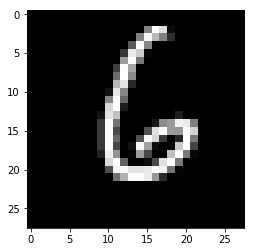

In [3]:
# visualize the data
i = 32
plt.imshow(training_images[i,:,:], cmap = 'gray')
print("The label corresponding to the image is:",training_labels[i])

The input data format should be (mini batch size, number of total pixels). So, we reshape the input data according to this format. Also, the images must be normalised before training and testing a neural network. 

In [4]:
training_images = np.reshape(training_images, (60000, 784))
test_images = np.reshape(test_images, (10000, 784))

print('Training set shape:  ' + str(training_images.shape))
print('Test set shape:  ' + str(test_images.shape))

# normalize the data
training_images = training_images/255
test_images = test_images/255

Training set shape:  (60000, 784)
Test set shape:  (10000, 784)


Define the model as sequential. The model includes the following layers:
 
1.   Fully connected layer  activation
2.   Final output layer with 10 units and SoftMax activation.

The model summary can be viewed using the command 'model.summary()'



In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape=(784,), name = 'dense1'),
    tf.keras.layers.Dense(10, activation = 'softmax', name = 'output')
])

model.summary()

W0624 12:46:06.023906 139857294329728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Model is compiled using Adam optimizer and the loss function is 'Sparse Categorical Crossentropy'.

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [7]:
hist = model.fit(training_images, training_labels, epochs=5, batch_size=10, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 352us/sample - loss: 0.1782 - acc: 0.9464 - val_loss: 0.0993 - val_acc: 0.9698
Epoch 2/5
60000/60000 [==============================] - 21s 350us/sample - loss: 0.0772 - acc: 0.9761 - val_loss: 0.0928 - val_acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 21s 355us/sample - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0815 - val_acc: 0.9772
Epoch 4/5
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0396 - acc: 0.9873 - val_loss: 0.0865 - val_acc: 0.9762
Epoch 5/5
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0854 - val_acc: 0.9791


In [42]:
i = 52
print("The true label is", test_labels[i])
y_pred = model.predict_classes(test_images[i,:].reshape(1,-1))
print("The predicted label is", y_pred[0])
#y_pred = model.predict_classes(test_images)
#print("The predicted label is", y_pred[i])

The true label is 5
The predicted label is 5


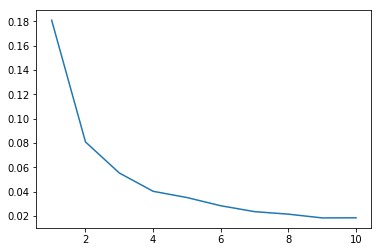

In [0]:
training_loss = hist.history['loss']
epochs = np.linspace(1, 10, 10)
plt.plot(epochs, training_loss)

# Lab: Cats vs Non-cats

In [0]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
# load training data
train_dataset = h5py.File('train_catvnoncat.h5', "r")
Xtr = np.array(train_dataset["train_set_x"][:]) # train set features
Ytr = np.array(train_dataset["train_set_y"][:]) # train set labels

# print the shape of training data
print("Input shape:", Xtr.shape)
print("Labels shape:", Ytr.shape)

Xtr = Xtr/255

Input shape: (209, 64, 64, 3)
Labels shape: (209,)


In [0]:
# Load test data
test_dataset = h5py.File('test_catvnoncat.h5', "r")
Xts = np.array(test_dataset["test_set_x"][:]) # test set features
Yts = np.array(test_dataset["test_set_y"][:]) # test set labels

Xts = Xts/255

# print the shape of test data
print("Input shape:", Xts.shape)
print("Labels shape:", Yts.shape)

Input shape: (50, 64, 64, 3)
Labels shape: (50,)


[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 0]
The label corresponding to the image is: 0


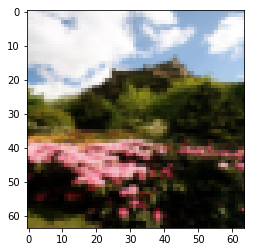

In [0]:
# visualize the data
print(Ytr)
print(Yts)
i = 32
plt.imshow(Xtr[i,:,:,:])
print("The label corresponding to the image is:",Ytr[i])

In [0]:
import tensorflow as tf

In [0]:
ntr, nrow, ncol, nchan = Xtr.shape
Xtr = Xtr.reshape((ntr, nrow*ncol*nchan))

nts, nrow, ncol, nchan = Xts.shape
Xts = Xts.reshape((nts, nrow*ncol*nchan))

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2048, activation = 'relu', input_shape=(nrow*ncol*nchan,), name = 'dense1'),
    tf.keras.layers.Dense(2, activation = 'softmax', name = 'output')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 2048)              25167872  
_________________________________________________________________
output (Dense)               (None, 2)                 4098      
Total params: 25,171,970
Trainable params: 25,171,970
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
hist = model.fit(Xtr, Ytr, epochs=10, batch_size=10, validation_data=(Xts,Yts))

Train on 209 samples, validate on 50 samples
Epoch 1/10
209/209 [==============================] - 4s 18ms/sample - loss: 25.8002 - acc: 0.5550 - val_loss: 7.7729 - val_acc: 0.6600
Epoch 2/10
209/209 [==============================] - 4s 19ms/sample - loss: 5.7247 - acc: 0.5502 - val_loss: 1.9759 - val_acc: 0.7000
Epoch 3/10
209/209 [==============================] - 4s 20ms/sample - loss: 2.7763 - acc: 0.5742 - val_loss: 6.0579 - val_acc: 0.3200
Epoch 4/10
209/209 [==============================] - 4s 20ms/sample - loss: 1.6956 - acc: 0.7081 - val_loss: 0.8192 - val_acc: 0.6600
Epoch 5/10
209/209 [==============================] - 4s 20ms/sample - loss: 0.5815 - acc: 0.7656 - val_loss: 0.7087 - val_acc: 0.7000
Epoch 6/10
209/209 [==============================] - 4s 20ms/sample - loss: 0.5557 - acc: 0.8038 - val_loss: 0.6530 - val_acc: 0.7200
Epoch 7/10
209/209 [==============================] - 4s 19ms/sample - loss: 0.4614 - acc: 0.7990 - val_loss: 0.8625 - val_acc: 0.7200
Epoch 8/1

# Lab: MNIST

In [0]:
# import packages

#TODO

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(Xtr,ytr),(Xts,yts) = tf.keras.datasets.mnist.load_data() # load the data 

11493376/11490434 [==============================] - 0s 0us/step
